Loading package / other files

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import data_managment as dm
import seaborn


Import and adapt df

In [5]:
importlib.reload(dm)
originial_df = pd.read_csv("data2.txt", sep="\t")
df = dm.build_adapted_df(originial_df);df

Country Name,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Uruguay,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe
Series Name,,,,,,,,,,,,,,,,,,,,,
Agricultural land (% of land area),58.123668,43.127737,17.365532,21.300000,40.042553,44.792155,20.454545,41.716051,58.897085,11.111111,...,81.506685,57.980531,15.340443,24.375035,38.840794,11.428571,72.225914,44.293805,32.063923,41.876696
Current health expenditure per capita (current US$),60.188671,202.013321,260.761261,NaN,2361.217529,95.124977,778.451111,1153.534058,357.457764,NaN,...,1450.144897,129.172775,82.241302,505.027771,124.059410,NaN,NaN,NaN,57.362690,112.411404
"Life expectancy at birth, total (years)",63.136000,78.860000,75.732000,NaN,NaN,61.092000,78.152000,76.308000,74.664000,75.617000,...,77.571000,70.755000,69.650000,72.058000,73.938000,79.168293,74.554000,66.064000,61.794000,60.306000
People practicing open defecation (% of population),13.643023,0.080386,0.900352,0.703887,0.000000,21.226596,0.264129,NaN,0.011157,1.473163,...,0.503675,0.000000,0.581828,3.402714,3.007105,0.000000,0.190396,14.209447,14.294533,25.082792
Population density (people per sq. km of land area),53.104284,104.967190,16.936908,252.240000,154.340426,23.385535,205.827273,15.928135,100.661574,582.633333,...,19.505005,72.284500,23.233634,34.852292,297.161430,307.188571,725.429900,55.446336,22.555807,37.359969
Terrestrial and marine protected areas (% of total territorial area),0.104707,13.147749,7.105500,8.708522,21.190930,5.004713,0.271690,7.528593,23.109003,0.527983,...,2.325009,3.375059,0.090759,36.902542,2.929447,0.991598,NaN,0.605805,38.049051,27.214542
Total greenhouse gas emissions (kt of CO2 equivalent),26889.999390,9090.000153,265359.985352,NaN,589.999974,85910.003662,1120.000005,373329.986572,9409.999847,NaN,...,37090.000153,170889.999390,819.999993,349730.010986,334450.012207,NaN,NaN,23899.999619,36389.999390,28530.000687


We can see there are many NaN : We can chose first to eleminate country with many NaN data (over 50% for example) that can bring outlier. But that value can be chose with the following graphic

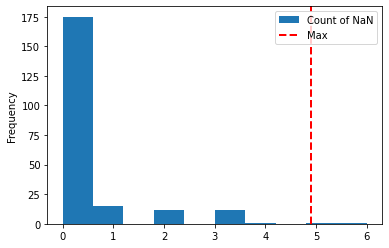

In [6]:
importlib.reload(dm)

df_nb_nan = dm.make_na_count(df)
df_nb_nan["Series"] = df_nb_nan.index
df_nb_nan.plot.hist(y="NaN_count",  label="Count of NaN")
max_nan = df.shape[0]*0.7
plt.axvline(max_nan, color='r', linestyle='dashed', linewidth=2, label="Max")
plt.legend(loc='upper right')

On s'intéresse à la partie gauche du graphique (avec le moins de NaN possible). On voit qu'en à 50% des données (la médiane) on obtient une quantité de NaN de 5, ce qui est acceptable pour la quantité de données. On supprime ensuite les pays correspondans à la partie gauche du graphique.

In [7]:
importlib.reload(dm)

df_step1_clean = dm.del_many_na_country(df, df_nb_nan, max_nan)

step 2 avec les séries

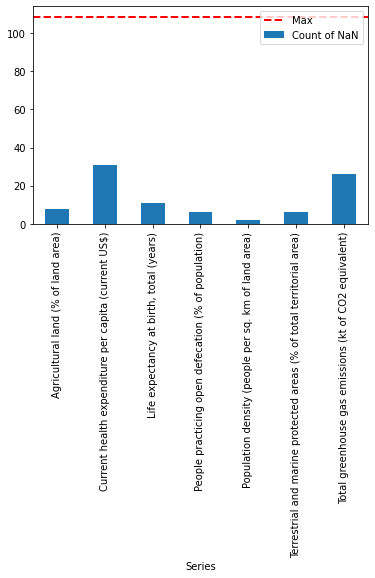

In [14]:
importlib.reload(dm)

df_nb_nan_s = dm.make_na_count(df,False)
df_nb_nan_s["Series"] = df_nb_nan_s.index 
df_nb_nan_s.plot.bar(y="NaN_count", x = "Series",  label="Count of NaN")
max_nan_s = df.shape[1]*0.5
plt.axhline(max_nan_s, color='r', linestyle='dashed', linewidth=2, label="Max")
plt.legend(loc='upper right')

on supprime quand au dessus de la barre

In [15]:
importlib.reload(dm)

df_step2_clean = dm.del_many_na_country(df_step2_clean, df_nb_nan_s, max_nan_s, True)

Maintenant on regarde si des données sont corrélé :

<AxesSubplot:xlabel='Series Name', ylabel='Series Name'>

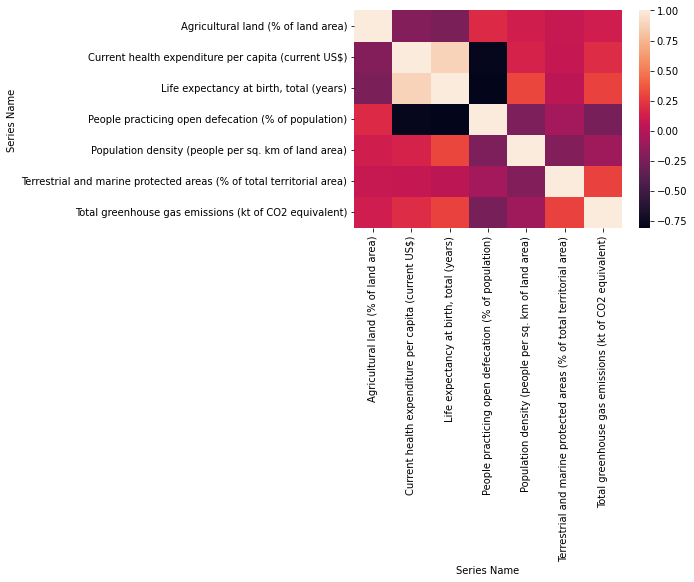

In [16]:
df_corr = df_step2_clean.T.corr("spearman")
seaborn.heatmap(df_corr)

Permet d'observer les différentes variables corrélés. On veut maintenant les supprimer

<AxesSubplot:xlabel='Series Name', ylabel='Series Name'>

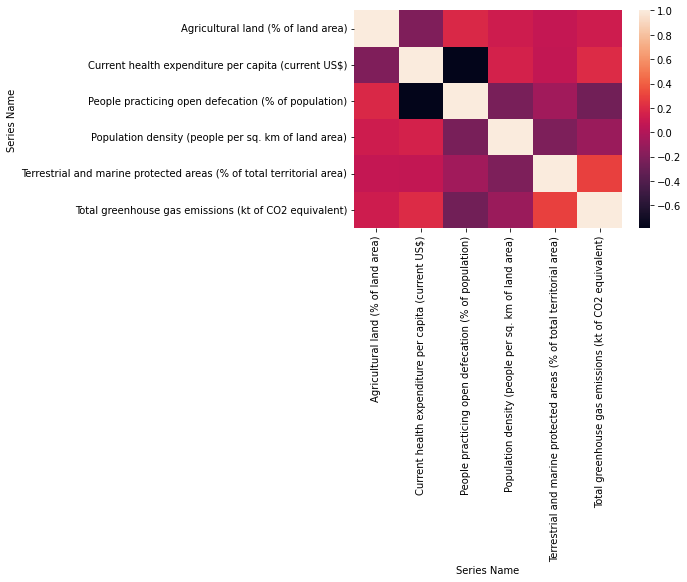

In [19]:
importlib.reload(dm)
df_step3_clean = dm.def_correled_series(df_step2_clean, df_corr,0.8)
df_corr_clean = df_step3_clean.T.corr("spearman")
seaborn.heatmap(df_corr_clean)

At this step, we eliminate correlation, we will now eleminate NaN value

In [20]:
importlib.reload(dm)

print([sum(df.isnull().sum()) ,sum(df_step1_clean.isnull().sum())
,sum(df_step2_clean.isnull().sum()) 
,sum(df_step3_clean.isnull().sum())])  # Evolution of NaN Value TODO: Graphique evolution



df_step4_clean = dm.replace_nan_knn(df_step3_clean)
df_step4_clean.T

[90, 79, 90, 79]


ValueError: Length mismatch: Expected axis has 216 elements, new values have 217 elements

Now we normalize

In [70]:
importlib.reload(dm)
n_df = dm.normalize_df(df_step4_clean.T)
dm.export_clean_data(n_df)

We search for outlier

In [1]:
seaborn.histplot(n_df)

NameError: name 'n_df' is not defined